C:\Users\User\Documents\repos\QD_LDS_readout\data\Tohoku data
(6250000,) (6250000,)


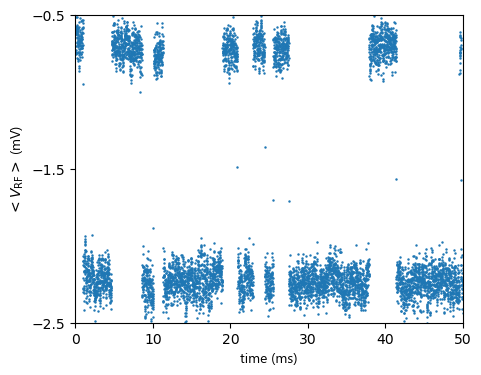

In [20]:
import expdata as ex
import numpy as np
import matplotlib.pyplot as plt
import os

#directory

path = r'C:\Users\User\Documents\repos\QD_LDS_readout\data\Tohoku data'
%cd $path

time_resolution = 8*5000#ns
def boxcar(t, signal, width = int(time_resolution/8)):
    print (t.shape, signal.shape)
    signal_ave = signal.reshape(-1, width).mean(axis = 1)
    t_ave = t.reshape(-1, width).mean(axis = 1)
    return t_ave, signal_ave
import h5py


d  = ex.load_data(200409155046)#200409155046, 201125150755
i = 5
n=1000

time, vrf = boxcar(d['time'].values, d['Vrf'].values[i],n)


#Draw graph with cutted plot
S_1, S_m = 36, 3600
s = S_1 * S_m / (S_1 * len(time) + S_m) # see
size = 4
fig = plt.figure(figsize= (size+1,size))
fig.patch.set_facecolor('white'); fig.patch.set_alpha(1.0)#; plt.tight_layout()
plt.scatter(time*1e-6,vrf*1e3, s = s)
plt.xlim(0,50)
plt.ylim(-0.0025*1e3,-0.0005*1e3)
plt.yticks([-0.0025*1e3, -0.0015*1e3, -0.0005*1e3],fontsize=10)
plt.xticks([0, 10, 20, 30, 40, 50],fontsize=10)
plt.xlabel("time (ms)",fontname="Segoe UI",fontsize=10)
plt.ylabel("$<V_{\mathrm{RF}}>$ (mV)",fontname="Segoe UI",fontsize=10)
plt.show()